## Import Dependency

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Collection

In [6]:
# Load the dataset into a Pandas DataFrame
df=pd.read_csv(r'C:\Users\Stella\Downloads\red_wine_quality\winequality-red.csv')

In [9]:
# Load the first 10 columns of the dataset
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [13]:
# Statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


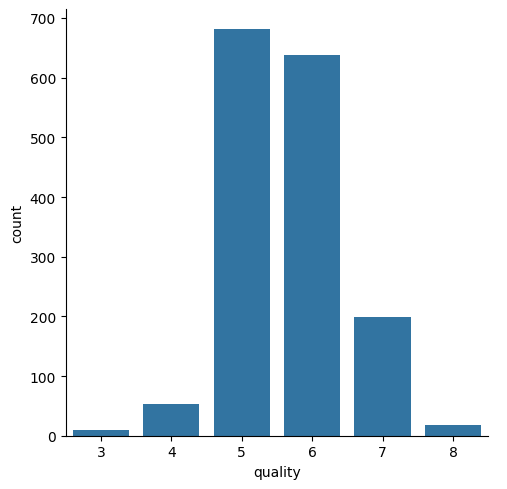

In [14]:
# Number of values for each quality
sns.catplot(x='quality',data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

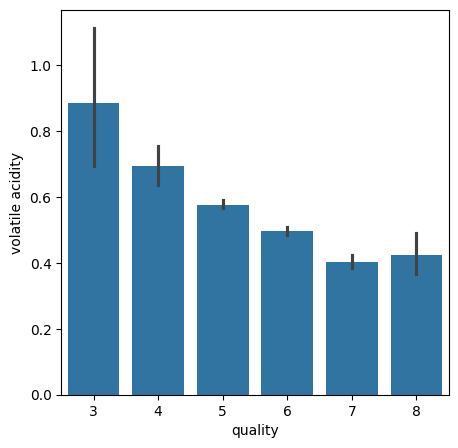

In [20]:
# Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

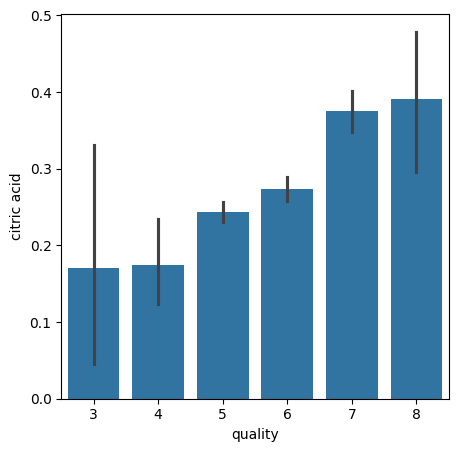

In [22]:
# Citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

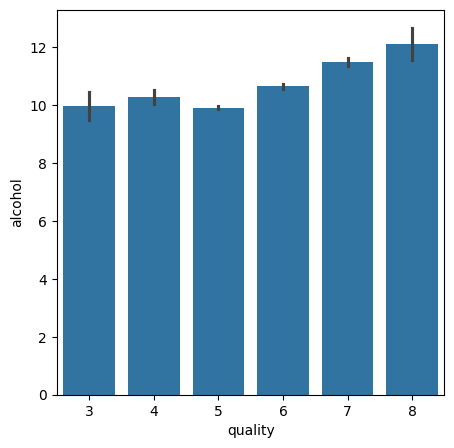

In [30]:
# Alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df)

## Correlation

1. Positive Correlation(Direct Proportional)
2. Negative Correlation(Inverse Proportional)

In [28]:
correlation=df.corr()

<Axes: >

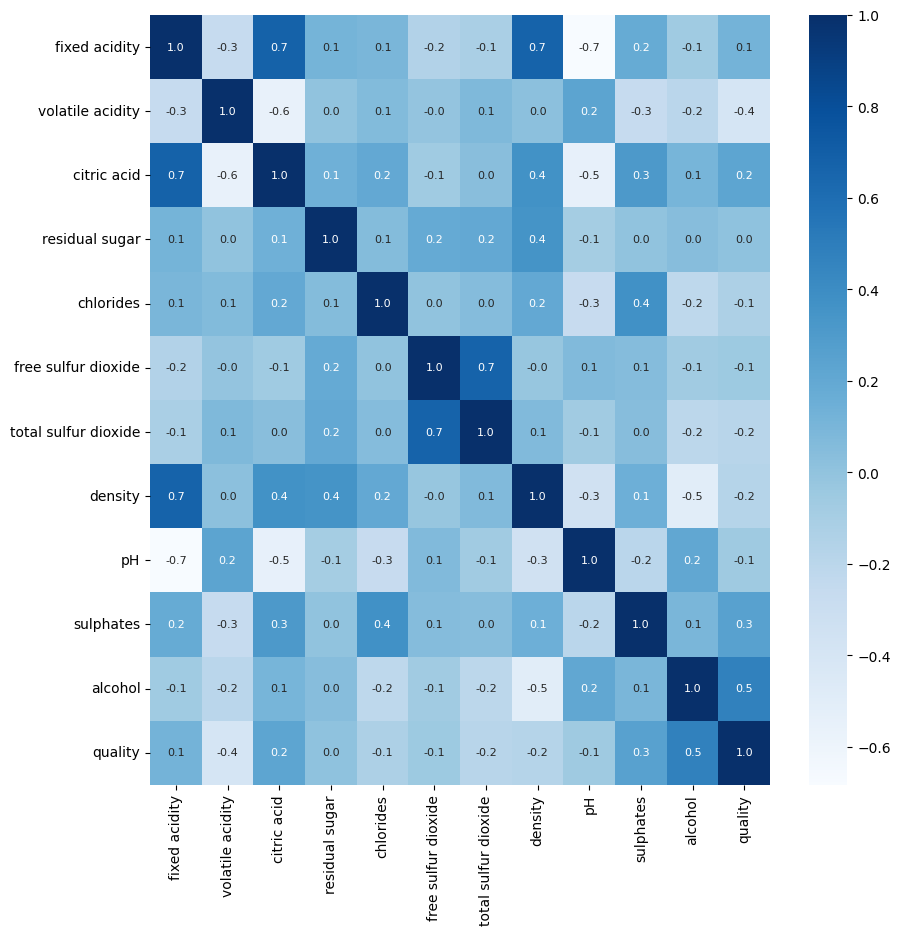

In [63]:
# Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [31]:
# Separate the data and label
X=df.drop('quality',axis=1)

In [32]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  ...  density    pH  sulphates  alcohol
0               7.4             0.700         0.00             1.9  ...  0.99780  3.51       0.56      9.4
1               7.8             0.880         0.00             2.6  ...  0.99680  3.20       0.68      9.8
2               7.8             0.760         0.04             2.3  ...  0.99700  3.26       0.65      9.8
3              11.2             0.280         0.56             1.9  ...  0.99800  3.16       0.58      9.8
4               7.4             0.700         0.00             1.9  ...  0.99780  3.51       0.56      9.4
...             ...               ...          ...             ...  ...      ...   ...        ...      ...
1594            6.2             0.600         0.08             2.0  ...  0.99490  3.45       0.58     10.5
1595            5.9             0.550         0.10             2.2  ...  0.99512  3.52       0.76     11.2
1596            6.3             0.510

## Label Binarization

In [64]:
# Did Label Binarization to classify any number higher than 7 was Good wine and any number lower was bad
Y=df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [34]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Train & Test Split

In [50]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [51]:
print(X.shape,X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


### Model Training:

### Random Forest Classifier

In [45]:
model=RandomForestClassifier()

In [52]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### Model Evaluation:

### Accuracy Score

In [53]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [54]:
print('Accuracy :', test_data_accuracy)

Accuracy : 0.946875


### Building a Predictive System

In [62]:
input_data=(9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3)

# Changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')


[1]
Good Quality Wine


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
